In [1]:
!python --version

Python 3.7.13


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

stop_words = stopwords.words('english')
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
btctweets_df = pd.read_csv('/content/Bitcoin_tweets.csv', encoding = 'utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
btctweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573255 entries, 0 to 2573254
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    float64
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
 12  is_retweet        object 
dtypes: float64(1), object(12)
memory usage: 255.2+ MB


In [22]:
btctweets_df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573250,Captain Crytpo,NaN,There's a new social order aligning. This is ...,2021-03-06 13:47:42,50.0,103.0,2086.0,False,2022-03-14 19:37:32,This should tell you plenty. DO NOT hold pape...,['BTC'],Twitter for Android,False
2573251,nadya,KİEV,BİTC0İN\n\nCAN U SEND GİFT PLS F0R WAR :(\n\nI...,2022-03-14 19:29:12,0.0,0.0,0.0,False,2022-03-14 19:37:32,TEwL3iCv1Xyn3Vr7C6CHMqdS36ixA6QWvc\n\ncan you ...,"['Bitcoin', 'bitcoins', 'BTC']",Twitter Web App,False
2573252,Crypto Cobra,NaN,OVER 100K FOLLOWERS ON TELEGRAM https://t.co/R...,2021-08-29 04:38:25,2105.0,68.0,34.0,False,2022-03-14 19:37:28,#TOP01 LOSSER LIST TODAY 14/03/22 📢\n\n#IMX/US...,"['TOP01', 'IMX', 'BTC', 'Binance', 'Coinbase',...",Twitter for iPhone,False
2573253,Cryptonia,NaN,🤖 #crypto #trading,2017-09-22 10:00:27,420.0,137.0,5568.0,False,2022-03-14 19:37:26,I am the only crazy person here? \n\n#btc #alts,"['btc', 'alts']",Twitter for iPhone,False


In [63]:
#example dataset 1 - Weekly observations (Feb 9-14th)

def week_sub(x):
  start_date='2022-01-01'
  end_date='2022-02-01'
  cond=(x['date'] >= start_date) & (x['date'] < end_date)
  btc_mod3=x.loc[cond]

  return btc_mod3

btctweets_week=week_sub(btctweets_df)
btctweets_week

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
1999534,Xiaoxiao,"Vancouver, Canada","Living alone in Vancouver, Canada, I usually l...",2014-07-18 11:02:16,511.0,413.0,19592.0,False,2022-01-14 23:59:59,Death Cross #bitcoin dump? https://t.co/UPjFVs...,['bitcoin'],Twitter Web App,False
1999535,ablawren,NaN,NaN,2011-09-28 16:46:46,26.0,557.0,12098.0,False,2022-01-14 23:59:56,#bitcoin is revolutionizing the insurance indu...,['bitcoin'],Twitter Web App,False
1999536,Jay Lockett,Kansas City Mo,"Kansas City’s best kept secret, Dad, Car Guy #...",2010-07-13 23:59:42,94.0,302.0,399.0,False,2022-01-14 23:59:56,Teaser! #Bitcoin #cryptocurrency #furniture ht...,"['Bitcoin', 'cryptocurrency', 'furniture']",Twitter for iPhone,False
1999537,co8jfr,NaN,NaN,2021-10-14 18:33:50,51.0,284.0,316.0,False,2022-01-14 23:59:56,I am claiming my free Lightning sats from @_bi...,"['Bitcoin', 'BTC', 'LN', 'LightningNetwork', '...",Twitter for Android,False
1999538,Adam.ETH,NaN,I like to invest in #crypto and #NFT,2021-11-14 21:50:30,235.0,924.0,3623.0,False,2022-01-14 23:59:52,"@mentalist420 Hey, Please check out my hand dr...","['NFTs', 'NFTCommunity', 'NFTGiveaway', 'NFTco...",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259616,Jess Kesker💎,"California, USA",“Everything is just a game”🌸,2010-08-20 20:58:36,144.0,341.0,5711.0,False,2022-01-19 19:08:16,"#BTC even broke the $42,000 support. A clear b...",['BTC'],Twitter Web App,False
2259617,Jose,NaN,#ETHFANTOKEN #ETH #ETHFANTOKENECOSYSTEM #BABYD...,2021-05-16 15:55:57,148.0,286.0,3005.0,False,2022-01-19 19:08:08,@ETHFanToken we eating dips like no other ever...,"['EthFans', 'Ethereum', 'btc', 'HODL', 'Ethere...",Twitter for iPhone,False
2259618,mr. decentralized,World,the decentralized is here. Now\n\nHODL #LUNA #...,2021-12-23 00:46:49,36.0,206.0,207.0,False,2022-01-19 19:08:02,The agitation at these price levels is unwarra...,"['cryptocurrency', 'cryptocrash', 'BTC', 'Ethe...",Twitter Web App,False
2259619,HODL Smaug,Lonely Montain,HODLing the $BTC Hoard since 2012. Trader / De...,2021-05-10 01:18:39,19.0,343.0,112.0,False,2022-01-19 19:07:54,Wake me when it's over. #Crypto #btc #Ethereum,"['Crypto', 'btc', 'Ethereum']",Twitter Web App,False


In [64]:
#cleaning/preprocessing the dataframe

#removing bots
def nobots(y):
  mod1=y[(y.is_retweet == False) &
          (y['user_name'].str.contains("Bot|bot|BOT|Real-Time|Tracker|App|Alert|alert|🤖") == False) &
          (y['user_description'].str.contains("Bot|bot|BOT|Real-Time|Tracker|App|Alert|alert|🤖") == False)]
  btc_mod1=mod1[['date', 'text']]
  
  return btc_mod1


#removing stop words and stemming
def stop_stem(x):
  x['text']=x['text'].str.lower()
  x['text']=x['text'].str.replace('[^a-zA-Z]', ' ')
  x['clean_text']=x['text']
  x['text']=x['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
  x['text']=x['text'].str.split()
  x['stem_txt']=x['text'].apply(lambda x: [stemmer.stem(y) for y in x])
  btc_mod2=x.drop(columns=['text'])

  return btc_mod2

#creating a text string
def listtostring(x):
  str_space=' '
  return x.apply(lambda x: str_space.join([str(y) for y in x]))


btctweets_df_nobots=nobots(btctweets_week)
btctweets_df_feb=stop_stem(btctweets_df_nobots)
btctweets_df_feb['mod_text']=listtostring(btctweets_df_feb['stem_txt'])
btctweets_df_feb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()


,date,clean_text,stem_txt,mod_text
1999534,2022-01-14 23:59:59,death cross bitcoin dump https t co upjfvs...,"[death, cross, bitcoin, dump, https, co, upjfv...",death cross bitcoin dump https co upjfvsctta
1999536,2022-01-14 23:59:56,teaser bitcoin cryptocurrency furniture ht...,"[teaser, bitcoin, cryptocurr, furnitur, https,...",teaser bitcoin cryptocurr furnitur https co jc...
1999538,2022-01-14 23:59:52,mentalist hey please check out my hand dr...,"[mentalist, hey, pleas, check, hand, draw, ite...",mentalist hey pleas check hand draw item feel ...
1999539,2022-01-14 23:59:49,aavegotchi to launch new set of defi nft weara...,"[aavegotchi, launch, new, set, defi, nft, wear...",aavegotchi launch new set defi nft wearabl htt...
1999540,2022-01-14 23:59:46,bluenft hey please check out my hand drawi...,"[bluenft, hey, pleas, check, hand, draw, item,...",bluenft hey pleas check hand draw item feel fr...
...,...,...,...,...
2259616,2022-01-19 19:08:16,btc even broke the support a clear b...,"[btc, even, broke, support, clear, break, evid...",btc even broke support clear break evid bull p...
2259617,2022-01-19 19:08:08,ethfantoken we eating dips like no other ever...,"[ethfantoken, eat, dip, like, ever, come, join...",ethfantoken eat dip like ever come join us eth...
2259618,2022-01-19 19:08:02,the agitation at these price levels is unwarra...,"[agit, price, level, unwarr, market, bearish, ...",agit price level unwarr market bearish yet one...
2259619,2022-01-19 19:07:54,wake me when it s over crypto btc ethereum,"[wake, crypto, btc, ethereum]",wake crypto btc ethereum


Full dataframe run time: 15 minutes

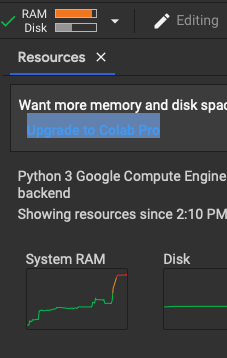

In [65]:
#sentiment scores

def subjscores(x):
  return TextBlob(x).sentiment.subjectivity

def polscores(x):
  return TextBlob(x).sentiment.polarity

def vaderscores(dfcol):
  analyzer = SentimentIntensityAnalyzer()
  return [analyzer.polarity_scores(x)['compound'] for x in dfcol]

btctweets_df_feb['subjectivity']=btctweets_df_feb['clean_text'].apply(subjscores)
btctweets_df_feb['polarity']=btctweets_df_feb['clean_text'].apply(polscores)
btctweets_df_feb['vcompound']=vaderscores(btctweets_df_feb['mod_text'])
#removing complete netural entries as they require deep tunning
btctweets_df_feb=btctweets_df_feb[(btctweets_df_feb['subjectivity'] != 0) | (btctweets_df_feb['polarity'] != 0) | (btctweets_df_feb['vcompound'] != 0) ]
btctweets_df_feb=btctweets_df_feb.sort_values(by='date')
btctweets_df_feb.reset_index(inplace=True)
btctweets_df_feb

,index,date,clean_text,stem_txt,mod_text,subjectivity,polarity,vcompound
0,2120894,2022-01-11 17:11:49,another decent bounce for bitcoin btc w ...,"[anoth, decent, bounc, bitcoin, btc, w, hr, sa...",anoth decent bounc bitcoin btc w hr say cautio...,0.638889,0.166667,0.2500
1,2120893,2022-01-11 17:11:49,lnr is going to be huge kucoin and bitmar...,"[lnr, go, huge, kucoin, bitmart, list, come, e...",lnr go huge kucoin bitmart list come ethereum ...,0.650000,0.250000,0.8225
2,2120892,2022-01-11 17:11:49,heads up i ll be going live this thursday at ...,"[head, go, live, thursday, utc, glozow, teach,...",head go live thursday utc glozow teach us best...,0.400000,0.568182,0.7506
3,2120890,2022-01-11 17:11:51,not too much but be good to me baby bin...,"[much, good, babi, bing, bong, nft, ethereum, ...",much good babi bing bong nft ethereum bitcoin ...,0.400000,0.450000,0.4404
4,2120888,2022-01-11 17:11:53,the project will be success in the future i w...,"[project, success, futur, look, forward, proje...",project success futur look forward project rec...,0.062500,0.150000,0.7351
...,...,...,...,...,...,...,...,...
172163,2175870,2022-01-22 23:59:48,i m going back to i love what i m see...,"[go, back, love, see, green, line, btc, inflow...",go back love see green line btc inflow subsid ...,0.294697,0.097727,0.8957
172164,2175869,2022-01-22 23:59:52,if you see a post advertising a crypto giveaw...,"[see, post, advertis, crypto, giveaway, ask, s...",see post advertis crypto giveaway ask send cry...,0.250000,0.250000,-0.5719
172165,2175868,2022-01-22 23:59:53,damn at least i m the only one fuerzanayid ...,"[damn, least, one, fuerzanayid, btc, eth, cryp...",damn least one fuerzanayid btc eth crypto http...,0.700000,-0.150000,-0.4019
172166,2175867,2022-01-22 23:59:55,eth amp btc who tf knows but in btc aroun...,"[eth, amp, btc, tf, know, btc, around, imo, bt...",eth amp btc tf know btc around imo btc next su...,0.000000,0.000000,0.4019


In [66]:
#df for future visualizations
btctweets_viz=btctweets_df_feb[['date', 'subjectivity', 'polarity', 'vcompound']]
btctweets_viz['date']= pd.to_datetime(btctweets_viz['date'])
btctweets_viz

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,subjectivity,polarity,vcompound
0,2022-01-11 17:11:49,0.638889,0.166667,0.2500
1,2022-01-11 17:11:49,0.650000,0.250000,0.8225
2,2022-01-11 17:11:49,0.400000,0.568182,0.7506
3,2022-01-11 17:11:51,0.400000,0.450000,0.4404
4,2022-01-11 17:11:53,0.062500,0.150000,0.7351
...,...,...,...,...
172163,2022-01-22 23:59:48,0.294697,0.097727,0.8957
172164,2022-01-22 23:59:52,0.250000,0.250000,-0.5719
172165,2022-01-22 23:59:53,0.700000,-0.150000,-0.4019
172166,2022-01-22 23:59:55,0.000000,0.000000,0.4019


In [68]:
btctweets_viz.date.dt.date.unique()

array([datetime.date(2022, 1, 11), datetime.date(2022, 1, 12),
       datetime.date(2022, 1, 13), datetime.date(2022, 1, 14),
       datetime.date(2022, 1, 19), datetime.date(2022, 1, 20),
       datetime.date(2022, 1, 21), datetime.date(2022, 1, 22)],
      dtype=object)

In [92]:
#preping dfs for the calculations/dashboard
btctweets_viz_12=btctweets_viz.loc[(btctweets_viz['date'] > '2022-01-11') & (btctweets_viz['date'] < '2022-01-13')]
btctweets_viz_13=btctweets_viz.loc[(btctweets_viz['date'] > '2022-01-12') & (btctweets_viz['date'] < '2022-01-14')]
btctweets_viz_14=btctweets_viz.loc[(btctweets_viz['date'] > '2022-01-13') & (btctweets_viz['date'] < '2022-01-19')]
btctweets_viz_20=btctweets_viz.loc[(btctweets_viz['date'] > '2022-01-19') & (btctweets_viz['date'] < '2022-01-21')]
btctweets_viz_21=btctweets_viz.loc[(btctweets_viz['date'] > '2022-01-20') & (btctweets_viz['date'] < '2022-01-22')]
btctweets_viz_22=btctweets_viz.loc[btctweets_viz['date'] > '2022-01-21']

#hourly means
def hourly_calcs(x):
  hours=x['date'].dt.hour
  hour_df=x.groupby(hours).mean()
  hour_df.reset_index(inplace=True)
  hour_df.rename(columns={'date': 'hour'}, inplace=True)

  return hour_df



btctweets_viz_12_hour=hourly_calcs(btctweets_viz_12)
btctweets_viz_13_hour=hourly_calcs(btctweets_viz_13)
btctweets_viz_14_hour=hourly_calcs(btctweets_viz_14)

btctweets_viz_20_hour=hourly_calcs(btctweets_viz_20)
btctweets_viz_21_hour=hourly_calcs(btctweets_viz_21)
btctweets_viz_22_hour=hourly_calcs(btctweets_viz_22)

In [110]:
#overview of hour df
print(btctweets_viz_12_hour)

    hour  subjectivity  polarity  vcompound
0      0      0.415547  0.170020   0.231303
1      1      0.459620  0.189809   0.216971
2      2      0.446351  0.167620   0.226375
3      3      0.435058  0.202595   0.308124
4      4      0.451685  0.204096   0.293420
5      5      0.464444  0.205512   0.297049
6      6      0.441955  0.189129   0.374702
7      7      0.453796  0.184954   0.406831
8      8      0.446075  0.184292   0.315145
9      9      0.459473  0.176064   0.296858
10    10      0.412405  0.197323   0.278433
11    11      0.396779  0.247524   0.343272
12    12      0.458029  0.222517   0.265530
13    13      0.393486  0.178019   0.263322
14    14      0.430328  0.191879   0.228841
15    15      0.431869  0.171434   0.202280
16    16      0.483107  0.224483   0.348916
17    17      0.459631  0.222105   0.305292
18    18      0.443742  0.203602   0.281039
19    19      0.417773  0.162811   0.198156
20    20      0.413447  0.164532   0.213738
21    21      0.430539  0.179453

In [101]:

btctweets_viz_20_22_hour=[btctweets_viz_20_hour,
                          btctweets_viz_21_hour,
                          btctweets_viz_22_hour]

btctweets_viz_12_14_hour=[btctweets_viz_12_hour,
                          btctweets_viz_13_hour,
                          btctweets_viz_14_hour]

#combining the 24 calculations for vcompound scores
def span24_hour_val(x):
  val_list = []
  for i in x:
    val_list.extend(i['vcompound'].tolist())

  return val_list

btctweets_viz_12_14_hour_vcompounds=span24_hour_val(btctweets_viz_12_14_hour)
btctweets_viz_20_22_hour_vcompounds=span24_hour_val(btctweets_viz_20_22_hour)

In [112]:
#btc df prep
btc_df = pd.read_csv('/content/BTC-Hourly.csv', encoding = 'utf-8')

In [113]:
btc_viz_df=btc_df[['date','close', 'Volume BTC', 'Volume USD']]
btc_viz_df['date']=pd.to_datetime(btc_viz_df['date'])
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33259 entries, 0 to 33258
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        33259 non-null  int64  
 1   date        33259 non-null  object 
 2   symbol      33259 non-null  object 
 3   open        33259 non-null  float64
 4   high        33259 non-null  float64
 5   low         33259 non-null  float64
 6   close       33259 non-null  float64
 7   Volume BTC  33259 non-null  float64
 8   Volume USD  33259 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.3+ MB


In [122]:
#selecting dates that match sentiment scores

btcviz_20=btc_viz_df.loc[(btc_viz_df['date'] > '2022-01-19') & (btc_viz_df['date'] < '2022-01-21')]
btcviz_21=btc_viz_df.loc[(btc_viz_df['date'] > '2022-01-20') & (btc_viz_df['date'] < '2022-01-22')]
btcviz_22=btc_viz_df.loc[(btc_viz_df['date'] > '2022-01-21') & (btc_viz_df['date'] < '2022-01-23')]

#applying the same function from earlier
btcviz_20_hour=hourly_calcs(btcviz_20)
btcviz_21_hour=hourly_calcs(btcviz_21)
btcviz_22_hour=hourly_calcs(btcviz_22)

In [125]:
btc_viz_20_22_hour=[btcviz_20_hour,
                    btcviz_21_hour,
                    btcviz_22_hour]

#collecting volumes, same function from earlier
def span24_hour_val(x):
  val_list = []
  for i in x:
    val_list.extend(i['Volume BTC'].tolist())

  return val_list

btc_viz_20_22_hour_volumebtc=span24_hour_val(btc_viz_20_22_hour)

In [149]:
btc_viz_20_22_hour_tweetandvolumeb_df= pd.DataFrame(
    {'vcompound': btctweets_viz_20_22_hour_vcompounds,
     'volumebtc': btc_viz_20_22_hour_volumebtc })

#scaling this specific case for visual comparisson
btc_viz_20_22_hour_tweetandvolumeb_df['vcompound']=btc_viz_20_22_hour_tweetandvolumeb_df['vcompound'].apply(lambda x: x*1000)

print(btc_viz_20_22_hour_tweetandvolumeb_df)

     vcompound   volumebtc
0   235.336854   23.051070
1   221.439952   52.850929
2   255.793682   43.022889
3   273.149856   75.715509
4   260.725352   28.075792
..         ...         ...
67  123.304693  111.129489
68  102.262060  338.396619
69  136.997581  323.573465
70  146.120399  366.321880
71  151.623780  217.415745

[72 rows x 2 columns]


In [94]:
#plotly examples
import plotly.graph_objects as go

In [99]:
#example 1: 3 metrics together in 24 hour range for a specific date

fig1=go.Figure()

fig1.add_trace(go.Scatter(x=btctweets_viz_22_hour.hour, y=btctweets_viz_22_hour.subjectivity,
                    mode='lines',
                    name='Subjectivity Score'))
fig1.add_trace(go.Scatter(x=btctweets_viz_22_hour.hour, y=btctweets_viz_22_hour.polarity,
                    mode='lines',
                    name='Polarity Score'))
fig1.add_trace(go.Scatter(x=btctweets_viz_22_hour.hour, y=btctweets_viz_22_hour.vcompound,
                    mode='lines',
                    name='VADER Compound Score'))

fig1.update_layout(template='plotly_dark', 
    yaxis=dict(title_text='Score',
    title_standoff=5),
    xaxis=dict(title_text='Day Hour (24-hours)',
    title_standoff=5),
    title_text='Twitter Sentiment View for BTC: 01/22/2022',
    title_x=0.5)
fig1.show()

In [151]:
#example 2: sentiment metric vs trade metric in 72 hour range for  specific dates

fig2=go.Figure()

fig2.add_trace(go.Scatter(x=btc_viz_20_22_hour_tweetandvolumeb_df.index,
                          y=btc_viz_20_22_hour_tweetandvolumeb_df.vcompound,
                    mode='lines',
                    name='VADER Compound Score'))
fig2.add_trace(go.Scatter(x=btc_viz_20_22_hour_tweetandvolumeb_df.index,
                          y=btc_viz_20_22_hour_tweetandvolumeb_df.volumebtc,
                    mode='lines',
                    name='Volume BTC'))

fig2.update_layout(template='plotly_dark', 
    yaxis=dict(title_text='Volume (VCompound Scaled * 1000)',
    title_standoff=5),
    xaxis=dict(title_text='Day Hour (72-hours)',
    title_standoff=5),
    title_text='Twitter Sentiment vs Volume BTC traded: 01/20/2022 - 01/22/2022',
    title_x=0.5)
fig2.show()